
Peak Fitting Results:

Peak 1 (Position: 380.13 ± 0.13):
Amplitude: 0.812 ± 0.018
Width: 26.50 ± 0.23 in ppm
Width: 1796.58 ± 15.93 in Hz
Eta: 0.39 ± 0.03
Offset: -66633.772 ± 0.000
Gaussian Area: 13.88 ± 0.80
Lorentzian Area: 13.31 ± 1.12
Total Area: 27.19 ± 1.38
--------------------------------------------------

Peak 2 (Position: 404.75 ± 3.30):
Amplitude: 0.094 ± 0.006
Width: 41.61 ± 4.87 in ppm
Width: 2821.63 ± 330.08 in Hz
Eta: 0.00 ± 0.26
Offset: 30009.056 ± 0.000
Gaussian Area: 4.18 ± 1.24
Lorentzian Area: 0.00 ± 1.63
Total Area: 4.18 ± 2.05
--------------------------------------------------

Peak 3 (Position: 501.22 ± 0.07):
Amplitude: 0.504 ± 0.003
Width: 25.93 ± 0.18 in ppm
Width: 1757.99 ± 12.03 in Hz
Eta: 0.00 ± 0.04
Offset: 33328.037 ± 0.000
Gaussian Area: 13.90 ± 0.57
Lorentzian Area: 0.00 ± 0.81
Total Area: 13.90 ± 0.99
--------------------------------------------------

Peak 4 (Position: 547.42 ± 0.03):
Amplitude: 0.954 ± 0.004
Width: 23.56 ± 0.09 in ppm
Width: 1597.3

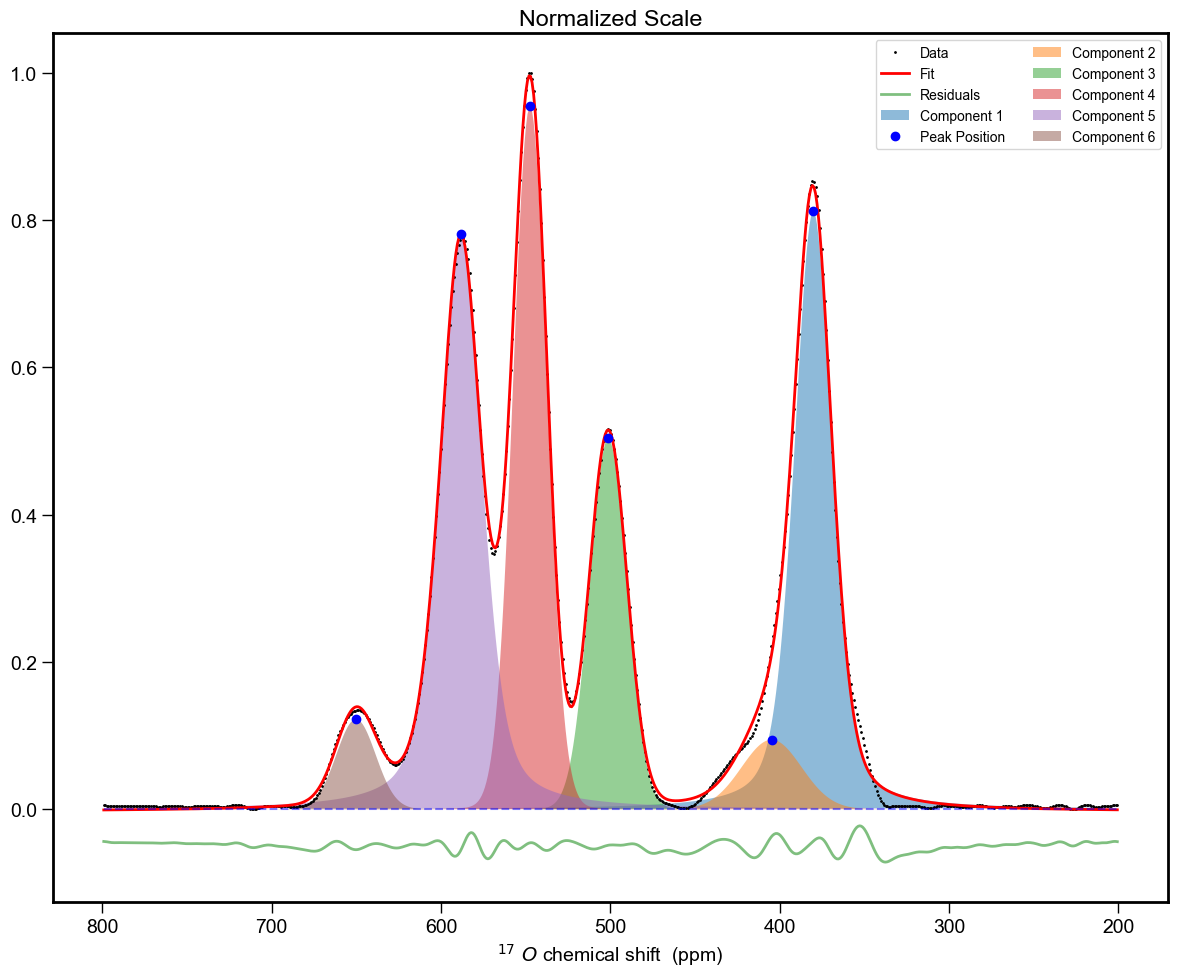

In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append("../../src")
from nmrlineshapeanalyser.core import NMRProcessor

#create NMRProcessor object

processor = NMRProcessor()

#Load filepath
filepath = r"..\..\data\six_peaks\4\pdata\1\\"


# Load the data

processor.load_data(filepath)

#Select the region of interest

x_data, y_data = processor.select_region(200, 800)

#Normalize the data and return normalised y_axis and the corresponding x_axis

x_data, y_normalized = processor.normalize_data(x_data, y_data)

#define initial parameters for the fitting
#this example is for a single peak
#format of the parameters is [x0, amplitude, width, eta, offset]
# x0 (position), amplitude, width, eta (mixing parameter), offset
#x0 has to be close to the peak position
initial_params = [
                  380, 0.12, 40.51, 0.89, -143.115, 
                  425, 0.12, 40.51, 0.89, -143.115,
                  500, 0.219, 55.43, 0.52, -143.115,
                  547, 0.12, 40.51, 0.89, -143.115,
                  586, 0.219, 55.43, 0.52, -143.155,
                  647, 0.12, 40.51, 0.89, -143.115
                  ]

number_of_peaks = 6
# fixed_x0 controls whether peak positions should be fixed during fitting
# False means position can vary, True means position is fixed
fixed_x0 = [False]*number_of_peaks

#FIt the data
popt, metrics, fitted = processor.fit_peaks(x_data, y_normalized, initial_params, fixed_x0)

#popt is the optimized parameters
#metrics is the metrics of the fitting
#fitted is the fitted curve data

#Plot and examine the results of the fitting
fig, axes, components = processor.plot_results(x_data, y_normalized, fitted, popt)

#Save the figure as an png file and the results as a csv file
processor.save_results(filepath, x_data, y_normalized, fitted, metrics, popt, components)